In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
train_dir=r"C:\Users\ADITYA SANDILYA\Documents\ML\projects\cats_and_dogs_small\train"
test_dir=r"C:\Users\ADITYA SANDILYA\Documents\ML\projects\cats_and_dogs_small\test"
valid_dir=r"C:\Users\ADITYA SANDILYA\Documents\ML\projects\cats_and_dogs_small\validation"

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [5]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode="binary")
valid_generator=test_datagen.flow_from_directory(valid_dir,target_size=(150,150),batch_size=20,class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
#build
from tensorflow.keras import models
from tensorflow.keras import layers

In [7]:
model=keras.models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [9]:
from tensorflow.keras import optimizers
model.compile(loss="binary_crossentropy",optimizer=optimizers.RMSprop(learning_rate=1e-4),metrics=["acc"])

In [23]:
model_history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=20,validation_data=valid_generator,validation_steps=50)

Epoch 1/20


C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_8052/3192977576.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=20,validation_data=valid_generator,validation_steps=50)


100/100 [==============================] - 59s 584ms/step - loss: 0.6925 - acc: 0.5135 - val_loss: 0.6761 - val_acc: 0.5330
Epoch 2/20
100/100 [==============================] - 52s 517ms/step - loss: 0.6567 - acc: 0.6040 - val_loss: 0.6487 - val_acc: 0.6460
Epoch 3/20
100/100 [==============================] - 53s 526ms/step - loss: 0.6253 - acc: 0.6440 - val_loss: 0.6188 - val_acc: 0.6720
Epoch 4/20
100/100 [==============================] - 55s 548ms/step - loss: 0.5780 - acc: 0.6945 - val_loss: 0.6047 - val_acc: 0.6710
Epoch 5/20
100/100 [==============================] - 54s 538ms/step - loss: 0.5429 - acc: 0.7355 - val_loss: 0.6118 - val_acc: 0.6620
Epoch 6/20
100/100 [==============================] - 51s 512ms/step - loss: 0.5107 - acc: 0.7460 - val_loss: 0.6229 - val_acc: 0.6580
Epoch 7/20
100/100 [==============================] - 51s 512ms/step - loss: 0.4825 - acc: 0.7640 - val_loss: 0.5752 - val_acc: 0.7000
Epoch 8/20
100/100 [==============================] - 48s 482ms/st

In [24]:
model.save("model.h5")

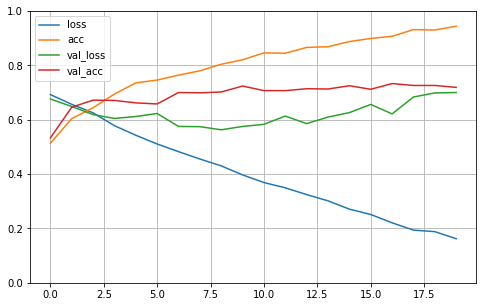

In [25]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [24]:
from keras import backend as k
k.clear_session()

In [ ]:
#Data_Augmentation


In [22]:
model=models.load_model('model.h5')

In [5]:
del model
k.clear_session()

NameError: name 'model' is not defined

In [34]:
train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=40,shear_range=0.2,zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode="binary")
valid_generator=test_datagen.flow_from_directory(valid_dir,target_size=(150,150),batch_size=20,class_mode="binary")
test_generator=test_datagen.flow_from_directory(test_dir,target_size=(150,150),batch_size=20,class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
model=keras.models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

In [15]:
model.compile(loss="binary_crossentropy",optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),metrics=["acc"])

In [16]:
model_history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=20,validation_data=valid_generator,validation_steps=50)

C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_8764/3192977576.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=20,validation_data=valid_generator,validation_steps=50)


Epoch 1/20
100/100 [==============================] - 114s 1s/step - loss: 0.6937 - acc: 0.5160 - val_loss: 0.6825 - val_acc: 0.5050
Epoch 2/20
100/100 [==============================] - 112s 1s/step - loss: 0.6810 - acc: 0.5615 - val_loss: 0.6635 - val_acc: 0.5710
Epoch 3/20
100/100 [==============================] - 101s 1s/step - loss: 0.6732 - acc: 0.5785 - val_loss: 0.6446 - val_acc: 0.6270
Epoch 4/20
100/100 [==============================] - 99s 994ms/step - loss: 0.6537 - acc: 0.5990 - val_loss: 0.6202 - val_acc: 0.6630
Epoch 5/20
100/100 [==============================] - 101s 1s/step - loss: 0.6347 - acc: 0.6450 - val_loss: 0.5994 - val_acc: 0.6790
Epoch 6/20
100/100 [==============================] - 100s 997ms/step - loss: 0.6217 - acc: 0.6575 - val_loss: 0.5933 - val_acc: 0.6860
Epoch 7/20
100/100 [==============================] - 103s 1s/step - loss: 0.6101 - acc: 0.6550 - val_loss: 0.5684 - val_acc: 0.6950
Epoch 8/20
100/100 [==============================] - 111s 1s/st

In [17]:
model.save("aug-model.h5")

In [25]:
del model
k.clear_session()

NameError: name 'model' is not defined

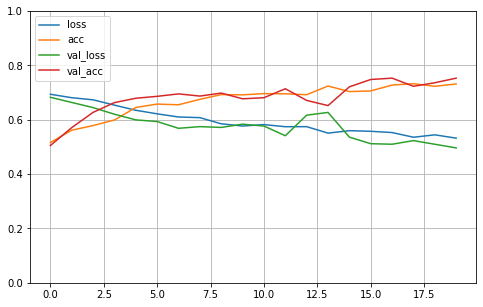

In [18]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [32]:
model=models.load_model("aug-model.h5")

In [35]:
model.evaluate(test_generator,steps=50)

50/50 [==============================] - 20s 397ms/step - loss: 0.5403 - acc: 0.7280


[0.5402597784996033, 0.7279999852180481]

In [21]:
#Transfer Learning
#VGG16
from keras.applications import VGG16
conv_base=VGG16(weights="imagenet",include_top=False,input_shape=(150,150,3))

58889256/58889256 [==============================] - 27s 0us/step


In [22]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [27]:
model=keras.models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation="relu"))
model.add(layers.Dense(1,activation="softmax"))

In [29]:
model.compile(loss="binary_crossentropy",optimizer=keras.optimizers.RMSprop(lr=1e-5),metrics=["acc"])

c:\Users\ADITYA SANDILYA\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model_history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=valid_generator,validation_steps=50)

In [ ]:
model.evaluate(train_dir,steps=50)